In [ ]:

from sqlalchemy import create_engine
import mysql.connector

# ✅ CSV 파일 경로
csv_path = "/home/kbj/Downloads/자전거도로+현황(2013년+이후)_20250324173134.csv"

# ✅ CSV 파일 불러오기
df = pd.read_csv(csv_path)

# ✅ 컬럼명 영문으로 변경
df.columns = [
    "gu_name",                # 자치구
    "total_routes",           # 노선수 (개)
    "total_length_km",        # 길이 (km)
    "exclusive_routes",       # 자전거 전용도로 노선수 (개)
    "exclusive_length_km",    # 자전거 전용도로 길이 (km)
    "shared_routes",          # 자전거보행자 겸용도로 노선수 (개)
    "shared_length_km",       # 자전거보행자 겸용도로 길이 (km)
    "bike_lane_routes",       # 자전거 전용차로 노선수 (개)
    "bike_lane_length_km",    # 자전거 전용차로 길이 (km)
    "priority_routes",        # 자전거우선도로 노선수 (개)
    "priority_length_km"      # 자전거우선도로 길이 (km)
]

# ✅ MySQL 연결 설정
conn = mysql.connector.connect(
    host="host",
    port=0000,
    user="user",
    password="password",
    database="project1"
)

# ✅ SQLAlchemy 엔진 생성
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

# ✅ MySQL에 테이블로 저장
df.to_sql("bike_roads", con=engine, if_exists="replace", index=False)

print("✅ bike_roads 테이블 업로드 완료")


/tmp/ipykernel_20357/283727273.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_bike = pd.read_sql(query_bike, conn)
/tmp/ipykernel_20357/283727273.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


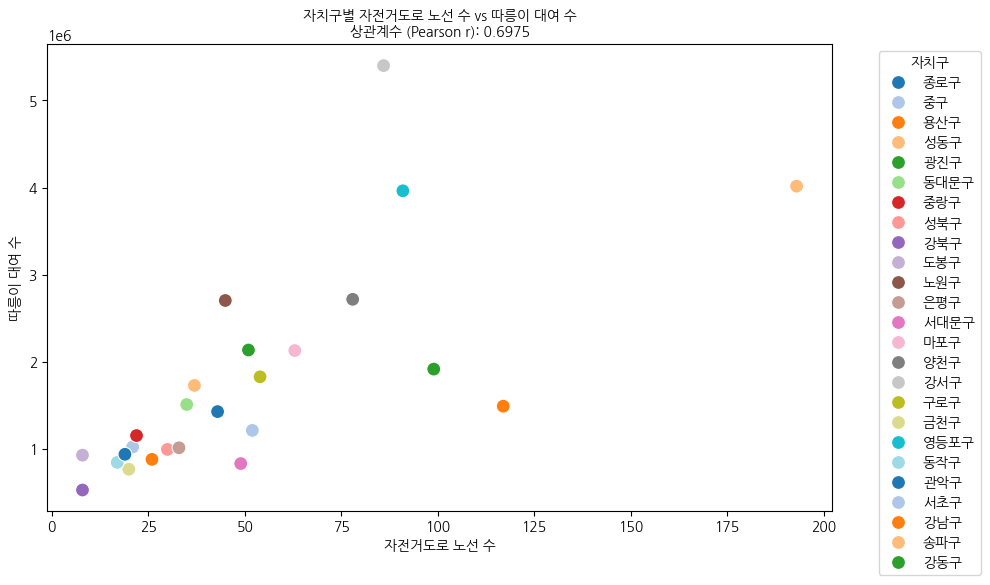

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib import font_manager as fm


# ✅ 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="host",
    port=0000,
    user="user",
    password="password",
    database="project1"
)

# ✅ 데이터 불러오기
query_bike = "SELECT gu_name, total_routes FROM bike_roads"
query_rental = """
    SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals 
    FROM rental_hourly_gu_summary 
    GROUP BY station_gu
"""

df_bike = pd.read_sql(query_bike, conn)
df_rental = pd.read_sql(query_rental, conn)
conn.close()

# ✅ 병합
merged_df = pd.merge(df_bike, df_rental, on="gu_name")

# ✅ 상관계수 계산
corr, _ = pearsonr(merged_df['total_routes'], merged_df['total_rentals'])

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='total_routes',
    y='total_rentals',
    hue='gu_name',
    palette='tab20',
    s=100
)
plt.title(f'자치구별 자전거도로 노선 수 vs 따릉이 대여 수\n상관계수 (Pearson r): {corr:.4f}', fontproperties=fontprop)
plt.xlabel('자전거도로 노선 수', fontproperties=fontprop)
plt.ylabel('따릉이 대여 수', fontproperties=fontprop)
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_20357/1161875497.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_shared = pd.read_sql(query_shared, conn)
/tmp/ipykernel_20357/1161875497.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


📌 상관계수 (Pearson r): 0.4931


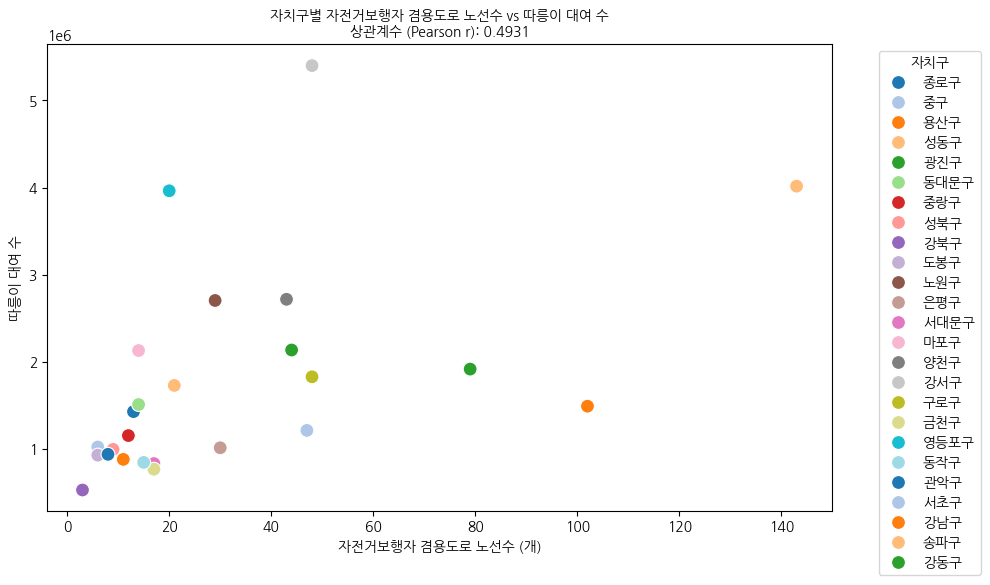

In [ ]:


# ✅ 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="host",
    port=0000,
    user="user",
    password="password",
    database="project1"
)

# ✅ 1. 자전거보행자 겸용도로 노선수 불러오기
query_shared = "SELECT gu_name, shared_routes FROM bike_roads"
df_shared = pd.read_sql(query_shared, conn)

# ✅ 2. 자치구별 따릉이 대여 수 불러오기
query_rental = """
SELECT 
    station_gu AS gu_name,
    SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu
"""
df_rental = pd.read_sql(query_rental, conn)

conn.close()

# ✅ 3. 병합
merged_df = pd.merge(df_shared, df_rental, on='gu_name')

# ✅ 4. 상관계수 계산
corr, _ = pearsonr(merged_df['shared_routes'], merged_df['total_rentals'])
print(f"📌 상관계수 (Pearson r): {corr:.4f}")

# ✅ 5. 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='shared_routes',
    y='total_rentals',
    hue='gu_name',
    palette='tab20',
    s=100
)
plt.title(f'자치구별 자전거보행자 겸용도로 노선수 vs 따릉이 대여 수\n상관계수 (Pearson r): {corr:.4f}', fontproperties=fontprop)
plt.xlabel('자전거보행자 겸용도로 노선수 (개)', fontproperties=fontprop)
plt.ylabel('따릉이 대여 수', fontproperties=fontprop)
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontprop)
plt.tight_layout()
plt.show()
